In [1]:
#### Ask Manny :
# 
#  Question : fitted_values is passed directly, but it should be filtered for each gene separately no?? 
#
# I m confused because beta I used is from the full model taking all genes, 
# and the fitted values are from the full model for each gene separately so I dont get the right numbers.

#cprrect 
####### r_squared_j / r_squared_full is not a standard calculation.
####### Just return r_squared_j as the proportion of variance explained, no?.  Answer: idk yet 

###### Maybe the problem is how we dined variance full model.

# Compute the full model Rsquared per gene (using the full data for each gene) pr full model for full genes?
# TO DO: 
# 
# run on the whole dataset for gene1 and one 

# APOB and LDL see screens hot and ask her to give a data for that model
# What i need from her 
# job script and she says then adds data where she writes file tsv file for data

# modify read me 

In [2]:
!pip uninstall umr-visualizer -y


In [3]:
! pip list | grep umr-visualizer

In [4]:
! pip install -e /Users/salmazainana/umr-visualizer
! pip install --upgrade nbformat



Obtaining file:///Users/salmazainana/umr-visualizer
  Preparing metadata (setup.py) ... done
  DEPRECATION: Legacy editable install of umr-visualizer==0.1.2 from file:///Users/salmazainana/umr-visualizer (setup.py develop) is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for umr-visualizer


In [5]:
# Check if package installed
! pip list | grep umr-visualizer

umr-visualizer            0.1.2       /Users/salmazainana/umr-visualizer


In [6]:
# # Even if the package is installed, sometimes Jupyter doesn’t recognize it. To fix this:
import sys
print(sys.executable)
sys.path.append("/Users/salmazainana/umr-visualizer")


/opt/anaconda3/envs/umr-visualizer/bin/python


In [7]:
import umr_visualizer as uv
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


# The dataset on the APOB gene (LDL description)

### Load data set 

In [8]:
# file_path = "/Users/salmazainana/Desktop/filtered_APOB_data.tsv"
# correct_columns = [
#     "locus", "alleles", "markerID", "gene", "annotation", "call_stats", "n_cases",
#     "n_controls", "heritability", "saige_version", "inv_normalized", "trait_type",
#     "phenocode", "pheno_sex", "coding", "modifier", "n_cases_defined", 
#     "n_cases_both_sexes", "n_cases_females", "n_cases_males", "description", 
#     "description_more", "coding_description", "category", "AC", "AF", "BETA", 
#     "SE", "AF.Cases", "AF.Controls", "Pvalue", "chr", "pos", "ref", "alt", 
#     "prob_0", "am_pathogenicity", "pLoF_indicator", "missense_indicator"
# ]

# df = pd.read_csv(file_path, sep="\t", skiprows=1, names=correct_columns)
# df.head()


In [9]:
# columns_to_keep = ["gene", "BETA", "SE", "prob_0", "am_pathogenicity", "pLoF_indicator", "missense_indicator"]

# # Keep only these columns
# df_filtered = df[columns_to_keep]
# df_filtered.head()

# Save the filtered DataFrame
output_file_path = "/Users/salmazainana/Desktop/filtered_APOB_data.tsv"
# df_filtered.to_csv(output_file_path, sep="\t", index=False)
df = pd.read_csv(output_file_path, sep="\t")
df.head()



,gene,BETA,SE,prob_0,am_pathogenicity,pLoF_indicator,missense_indicator
0,APOB,0.012711,0.96865,0.042032,0.1485,0,1
1,APOB,1.577000,0.96861,0.023355,0.0902,0,1
2,APOB,-0.548010,0.96840,0.000067,0.2574,0,1
3,APOB,1.034900,0.96867,0.000040,NaN,0,0
4,APOB,-0.004753,0.14775,0.000040,0.1224,0,1


In [10]:
#print number of examples
print(f"Number of examples: {df.shape[0]}")

Number of examples: 1067213


In [11]:
print(df.nunique())

gene                       1
BETA                  326120
SE                    103251
prob_0                  2775
am_pathogenicity        1529
pLoF_indicator             2
missense_indicator         2
dtype: int64


In [12]:

# Check if there are NaNs in any columns 
# df.isnull().sum()



In [13]:
# # fill the Nan Values with average of the column for prob_0 and am+pathogenicity
# df["prob_0"] = df["prob_0"].fillna(df["prob_0"].mean())
# df["am_pathogenicity"] = df["am_pathogenicity"].fillna(df["am_pathogenicity"].mean())
# df.isnull().sum()

# Drop rows with NaN values
# df = df.dropna()
# df.isnull().sum()


# We can't drop them because we will lose a the variety in the two last columns 
# instead we can fill them with the mean of the column
df["prob_0"] = df["prob_0"].fillna(df["prob_0"].mean())
df["am_pathogenicity"] = df["am_pathogenicity"].fillna(df["am_pathogenicity"].mean())



In [14]:
df.isnull().sum()

gene                  0
BETA                  0
SE                    0
prob_0                0
am_pathogenicity      0
pLoF_indicator        0
missense_indicator    0
dtype: int64

In [15]:
print(f"Number of examples: {df.shape[0]}")

Number of examples: 1067213


In [16]:
print(df.nunique()) # to make sure no constant columns

gene                       1
BETA                  326120
SE                    103251
prob_0                  2776
am_pathogenicity        1530
pLoF_indicator             2
missense_indicator         2
dtype: int64


### Preprocessing 

In [17]:
df.head()

,gene,BETA,SE,prob_0,am_pathogenicity,pLoF_indicator,missense_indicator
0,APOB,0.012711,0.96865,0.042032,0.148500,0,1
1,APOB,1.577000,0.96861,0.023355,0.090200,0,1
2,APOB,-0.548010,0.96840,0.000067,0.257400,0,1
3,APOB,1.034900,0.96867,0.000040,0.195181,0,0
4,APOB,-0.004753,0.14775,0.000040,0.122400,0,1


In [18]:
print("SE min:", np.min(df["SE"]))
print("SE max:", np.max(df["SE"]))

SE min: 0.0
SE max: 7758.7


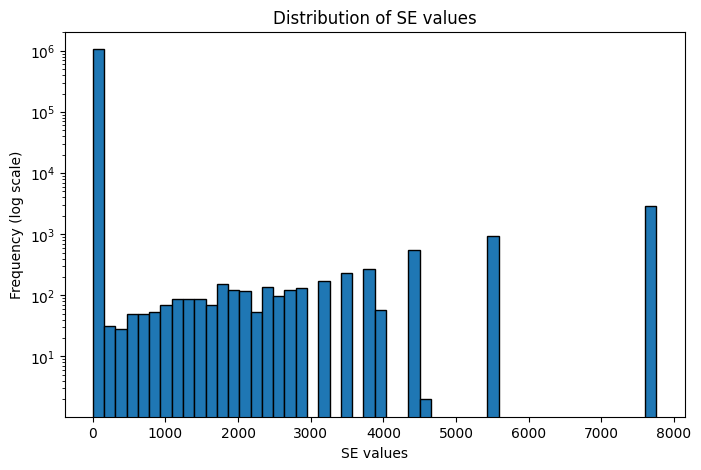

In [19]:
# Assuming SE values are stored in a variable called se_values
se_values = df["SE"].values

# Plot histogram of SE values
plt.figure(figsize=(8, 5))
plt.hist(se_values, bins=50, edgecolor="black", log=True)  # Log scale for better visibility
plt.xlabel("SE values")
plt.ylabel("Frequency (log scale)")
plt.title("Distribution of SE values")
plt.show()

In [20]:
# Compute IQR
Q1 = np.percentile(se_values, 25)
Q3 = np.percentile(se_values, 75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where SE is outside the bounds
valid_indices = (se_values >= lower_bound) & (se_values <= upper_bound)
df_filtered = df[valid_indices]


In [21]:
print("SE min:", np.min(df_filtered["SE"]))
print("SE max:", np.max(df_filtered["SE"]))

SE min: 0.0
SE max: 1.7498


In [22]:
print(f"Number of examples: {df_filtered.shape[0]}")

Number of examples: 1052887


In [23]:
# Clip very small SE values to avoid extreme w values
SE_min_threshold = 1e-2  # Adjust as needed
df_filtered = df_filtered[df_filtered["SE"] >= SE_min_threshold]
print("SE min:", np.min(df_filtered["SE"]))
print("SE max:", np.max(df_filtered["SE"]))
print(f"Number of examples: {df_filtered.shape[0]}")

SE min: 0.010003
SE max: 1.7498
Number of examples: 1049198


In [24]:
X_full = df_filtered[["prob_0", "am_pathogenicity", "pLoF_indicator", "missense_indicator"]].values
y = df_filtered['BETA'].values
w = 1 / (df_filtered['SE'].values ** 2)


In [25]:
print("w contains NaN:", np.isnan(w).any())
print("w contains Inf:", np.isinf(w).any())
print("w min:", np.min(w))
print("w max:", np.max(w))
print("the shape of w is:", w.shape)

w contains NaN: False
w contains Inf: False
w min: 0.3266052606100299
w max: 9994.002698920405
the shape of w is: (1049198,)


In [26]:
# Print the shape of matrix X_full
print("Shape of X_full:", X_full.shape)

Shape of X_full: (1049198, 4)


In [27]:
X_w = X_full.T * w
tmp = X_w @ X_full# Equivalent to X_full.T @ np.diag(w) @ X_full

In [28]:

print("Determinant:", np.linalg.det(tmp))
print("Rank:", np.linalg.matrix_rank(tmp), "/", tmp.shape[0])

Determinant: 2.182307612322103e+23
Rank: 4 / 4


In [29]:
matrix_to_invert = np.linalg.pinv(tmp) 


In [30]:
beta_full = matrix_to_invert @ (X_w @ y)


In [31]:

fitted_values_full = np.dot(X_full, beta_full)


In [32]:
corr_matrix = pd.DataFrame(X_full).corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
          0         1         2         3
0  1.000000 -0.004740  0.018263  0.005628
1 -0.004740  1.000000  0.000118 -0.000395
2  0.018263  0.000118  1.000000 -0.298417
3  0.005628 -0.000395 -0.298417  1.000000


The highest absolute correlation is -0.2984, which is still moderate at best.

In [33]:
# Does X_full contain any NaN values?
print("X_full contains NaN:", np.isnan(X_full).any())

X_full contains NaN: False


In [34]:
print(pd.DataFrame(X_full).nunique())

0    2776
1    1530
2       2
3       2
dtype: int64


## Plotting of filtered data

In [35]:
%matplotlib inline


Moderators identified: ['prob_0', 'am_pathogenicity', 'pLoF_indicator', 'missense_indicator']
Unique genes found: ['APOB']
Computing variance explained for moderator: prob_0
Computing variance explained for moderator: am_pathogenicity
Computing variance explained for moderator: pLoF_indicator
Computing variance explained for moderator: missense_indicator
Processing full model R² for gene: APOB
For gene APOB : SSR Full= 1103241.0900303237, SST= 1103338.7102968858
Computed Full Model R² values: {'APOB': np.float64(8.8477151803934e-05)}
Generating plot for gene: APOB
   gene  Proportion_Variance_Explained
0  APOB                       0.241823
   gene  Proportion_Variance_Explained
0  APOB                       0.473308
   gene  Proportion_Variance_Explained
0  APOB                       0.410139
   gene  Proportion_Variance_Explained
0  APOB                       0.470665
Variance data for gene APOB: {'prob_0': np.float64(0.2418231671907962), 'am_pathogenicity': np.float64(0.473308463234

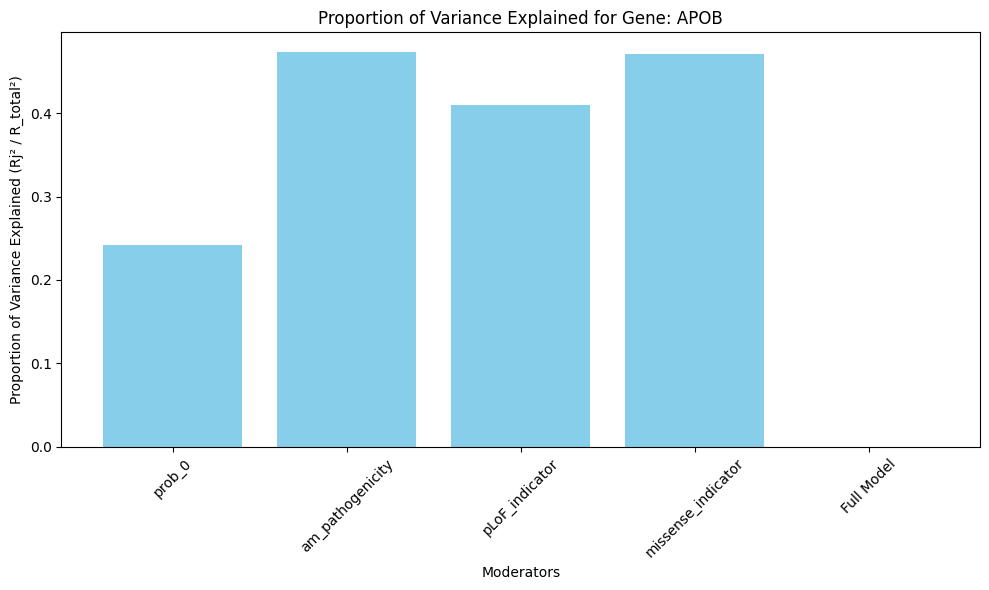

In [36]:
uv.plot_proportion_variance_explained(df_filtered, fitted_values_full, style="matplotlib", gene_filter=["APOB"])

If the variance explained by each moderator separately is high, but the full model’s R^2 is low, then:
- The moderators might be explaining the same variance, so they don’t add up in the full model.
- The variance explained per moderator is overestimated due to shared variance with other factors.

Variance Inflation Factor (VIF) is a measure of multicollinearity among the independent variables in a regression model.

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_filtered[["prob_0", "am_pathogenicity", "pLoF_indicator", "missense_indicator"]]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

              Feature       VIF
0              prob_0  1.039968
1    am_pathogenicity  1.870392
2      pLoF_indicator  1.052101
3  missense_indicator  1.831525


Since all VIF values are below 5, predictors are not highly correlated, meaning they are relatively independent./

Moderators identified: ['prob_0', 'am_pathogenicity', 'pLoF_indicator', 'missense_indicator']
Unique genes found: ['APOB']
Computing variance explained for moderator: prob_0
Computing variance explained for moderator: am_pathogenicity
Computing variance explained for moderator: pLoF_indicator
Computing variance explained for moderator: missense_indicator
Processing full model R² for gene: APOB
For gene APOB : SSR Full= 1103241.0900303237, SST= 1103338.7102968858
Computed Full Model R² values: {'APOB': np.float64(8.8477151803934e-05)}
Generating plot for gene: APOB
   gene  Proportion_Variance_Explained
0  APOB                       0.241823
   gene  Proportion_Variance_Explained
0  APOB                       0.473308
   gene  Proportion_Variance_Explained
0  APOB                       0.410139
   gene  Proportion_Variance_Explained
0  APOB                       0.470665
Variance data for gene APOB: {'prob_0': np.float64(0.2418231671907962), 'am_pathogenicity': np.float64(0.473308463234

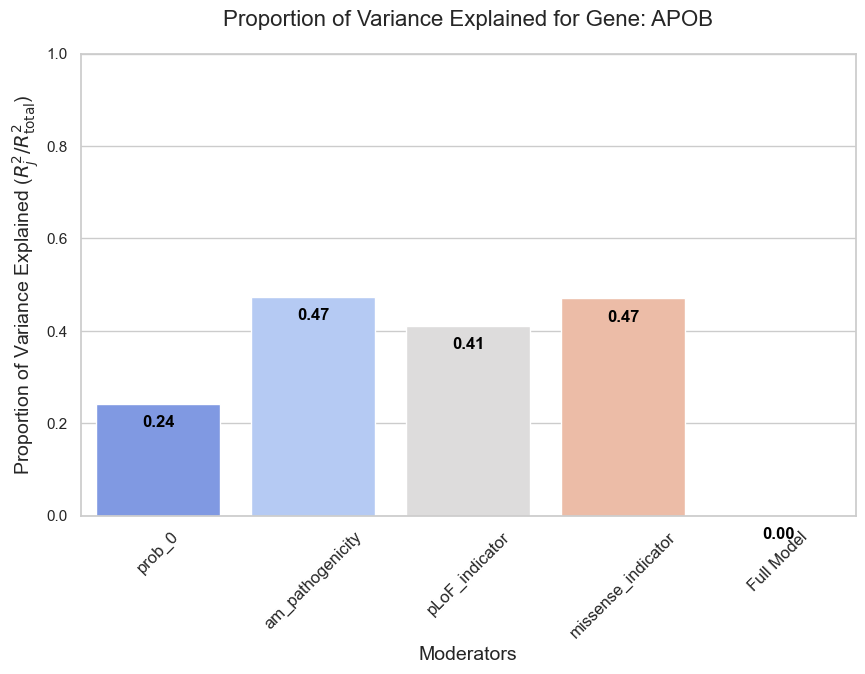

In [38]:
uv.plot_proportion_variance_explained(df_filtered, fitted_values_full, style="seaborn", gene_filter=["APOB"])

In [39]:
uv.plot_proportion_variance_explained(df_filtered, fitted_values_full, style="plotly", gene_filter=["APOB"])

Moderators identified: ['prob_0', 'am_pathogenicity', 'pLoF_indicator', 'missense_indicator']
Unique genes found: ['APOB']
Computing variance explained for moderator: prob_0
Computing variance explained for moderator: am_pathogenicity
Computing variance explained for moderator: pLoF_indicator
Computing variance explained for moderator: missense_indicator
Processing full model R² for gene: APOB
For gene APOB : SSR Full= 1103241.0900303237, SST= 1103338.7102968858
Computed Full Model R² values: {'APOB': np.float64(8.8477151803934e-05)}
Generating plot for gene: APOB
   gene  Proportion_Variance_Explained
0  APOB                       0.241823
   gene  Proportion_Variance_Explained
0  APOB                       0.473308
   gene  Proportion_Variance_Explained
0  APOB                       0.410139
   gene  Proportion_Variance_Explained
0  APOB                       0.470665
Variance data for gene APOB: {'prob_0': np.float64(0.2418231671907962), 'am_pathogenicity': np.float64(0.473308463234